<a href="https://colab.research.google.com/github/deadex-ng/Outreachy_FumbaniBanda_2023/blob/main/South_Malawi_Montane_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration of South Malawi montane forest-grassland mosaic

> ## 🗒  Table of Contents 
> ### ⛩[Install Libraries](#install-libraries)</br>
> ### ⛩[Install Librariess](#install-librariess)
> ### 🚆[Import Libraries](#import-libraries)</br>
> ### 🚀[Utility Functions](#utility-functions)
> ### 🌠[Malawi's Districts Boundaries](#malawi-districts-boundaries)</br>
> ### 🇲[South Malawi montane forest](#south-malawi-montane-forest)</br>
> ### ℹ[General Information](#general-information)</br>
> ### ♨[Climate Zones](#climate-zones)</br>
> ### 🔰[Bioclimatic and Ecologiclal Zones](#biolclimatic-and-ecological-zones)</br>
> ### 🎋[Agro Ecological Zones](#agro-ecological-zones)</br>
> ### ✅[Holdridge Life Zones](#holdridge-life-zones)</br>
> ### ⛰[Soil Resource](#soil-resource)</br>
> ### 🥶[Annual Mean Temperature](#annual-mean-temperature)</br>
> ### 🌧[Annual Precipitation](#annual-precipitation)</br>


<a name="install-libraries"></a>
## Install Librariess

In [ ]:
!pip install geopandas
!pip install rasterio
!pip install geemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 50.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 10.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 68.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 KB 21.6

<a name="import-libraries"></a>
## Import Libraries

In [ ]:
# dataset download
import io, requests, zipfile

# dataframes
import numpy as np
import pandas as pd
import geopandas as gpd

# rasters
import rasterio as rst
from rasterio.plot import show
from rasterio.mask import mask

# plot and graphs
import matplotlib.pyplot as plt
from matplotlib import cm, colors

# ignore warning about missing/empty geometries
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
plt.rcParams.update({'figure.max_open_warning': 0})

# earth engine visualizations
import ee
import geemap

# for dependencies
%matplotlib inline

<a name="utility-functions"></a>
## Utility Functions

In [ ]:
def plot_districts(ax):
  mwi_boundaries_df.plot(ax=ax, column='name', edgecolor='silver', legend=True)

def plot_colorless_disctricts(ax):
  mwi_boundaries_df.plot(ax=ax, color='none', edgecolor='silver')

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd gdrive/MyDrive/outreachy-moja

/content/gdrive/MyDrive/outreachy-moja


<a name="malawi-districts-boundaries"></a>
## Malawi's Districts Boundaries
The South Malawi montane forest-grassland mosaic is spread across various districts in the Southern region of Malawi. We load the dataset for administrative boundaries for all the districts in Malawi. This will be used as the background for more visualizations.

In [ ]:
# mwi_boundaries_df = gpd.read_file('MWI_AL2_Malawi.json')
mwi_boundaries_df = gpd.read_file('MWI_ALL_states.json')
mwi_boundaries_df = mwi_boundaries_df[['name', 'geometry']]

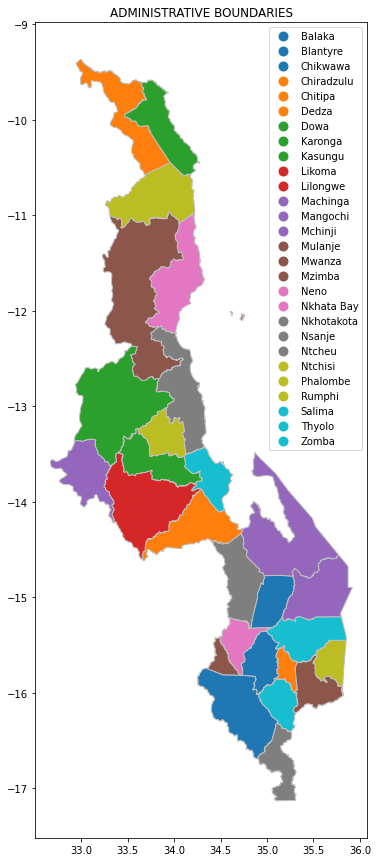

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_title('ADMINISTRATIVE BOUNDARIES')

plot_districts(ax)

<a name="south-malawi-montane-forest"></a>
## South Malawi montane forest
The South Malawi montane forest in Malawi is spread accross 10 discricts.

In [ ]:
terrestrial_ecoregions_df = gpd.read_file('TerrestrialEcoregionsoftheWorld_WWF.geojson')
terrestrial_ecoregions_df['ECO_NAME'].unique()
forest_df = terrestrial_ecoregions_df[terrestrial_ecoregions_df['ECO_NAME'] ==  'South Malawi montane forest-grassland mosaic']

In [ ]:
def plot_forest(ax, color='none', edgecolor='seagreen', linewidth=3):
  """
  Plots forest's boundaries on the map.
  """
  forest_df.plot(ax=ax, color=color, edgecolor=edgecolor, linewidth=linewidth)


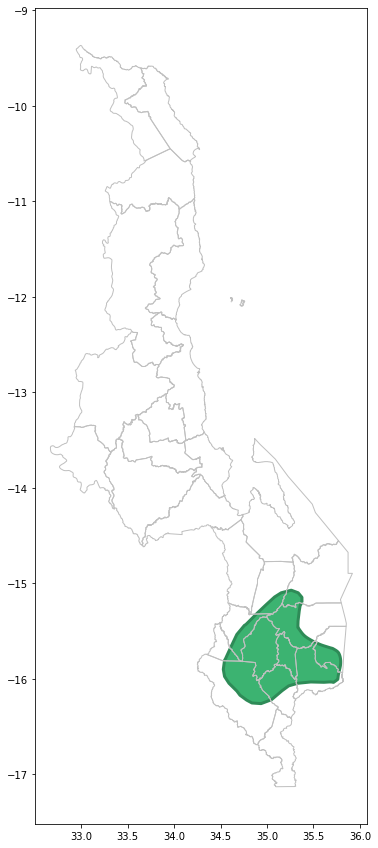

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
plot_forest(ax=ax, color='mediumseagreen')
plot_colorless_disctricts(ax=ax)
plt.show()

<a name="general-information"></a>
## General Information

In [ ]:
area_km2 = forest_df['area_km2'].unique()[0]
realm    = forest_df['REALM_1'].unique()[0]
biome    = forest_df['BIOME'].unique()[0]
gbl_stat = forest_df['GBL_STAT'].unique()[0]

In [ ]:
print(f'Area of the Ecoregion: {area_km2} km2',
      f'Biogeographical Realm: {realm}',
      f'Global Status: {gbl_stat}(vulnerable)',
      f'Biome: {biome}(Temperate Conifer Forests)',
      sep='\n')

Area of the Ecoregion: 10191 km2
Biogeographical Realm: Afrotropics
Global Status: 1(vulnerable)
Biome: 10(Temperate Conifer Forests)


<a name="climate-zones"></a>
## Climate Zones 
Climate zones are areas of the world that share similar weather patterns and temperatures. These zones are defined by factors such as temperature, humidity, rainfall, and vegetation.

In [ ]:
climate_df = gpd.read_file('IPCC_ClimateZoneMap_Vector.geojson')

In [ ]:
climate_classification = {'1': 'Warm Temperate Moist', '7': 'Boreal Moist', 
                          '8': 'Boreal Dry', '9': 'Tropical Montane',
                          '11': 'Tropical Rainforest Climate', '12': 'Tropical Monsoon Climate'}

# normalize column's name
climate_df.rename(columns={'CLASS_NAME': 'class_name'}, inplace=True)

# remove oceans
climate_df = climate_df[climate_df.class_name != 0]

# replace classification codes with actual names
climate_df.class_name = climate_df.class_name.astype('str').replace(climate_classification)

# get only necessary data related to forest
forest_climate_df = climate_df.clip(forest_df)

In [ ]:
def plot_features(features_df, ax, column, cmap='Set3'):
  """
  Plots some of the forest's features on the map.
  """
  features_df.plot(ax=ax, cmap=cmap, column=column, legend=True)


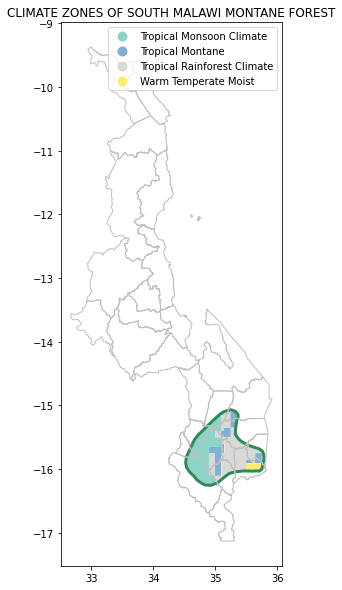

In [ ]:
# visualize climate zones on the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.set_title('CLIMATE ZONES OF SOUTH MALAWI MONTANE FOREST')

plot_features(forest_climate_df, ax=ax, column='class_name')
plot_forest(ax=ax)
plot_colorless_disctricts(ax=ax)

plt.show()

<a name="biolclimatic-and-ecological-zones"></a>
## Bioclimatic and Ecologiclal Zones

<a name="agro-ecological-zones"></a>
### Agro-ecological Zones

In [ ]:
# download agro-ecological zones data
agroeco_zones_df    = gpd.read_file('GlobalAgroEcologicalZones_GAEZ.geojson')

In [ ]:
values = {'1': 'Steep terrain', '2': 'Artic/Cold', '3': 'Desert/Arid', 
          '4': 'Irrigated Soils', '5': 'Hydromorphic soils', 
          '6': 'Dry, good soils', '7': 'Dry, moderate soils', '8': 'Dry, poor soils', 
          '9': 'Moist, good soils', '10': 'Moist, moderate soils', 
          '11': 'Moist, poor soils', '12': 'Sub-humid, good soils', 
          '13': 'Sub-humid, moderate soils', '14': 'Sub-humid, poor soils', 
          '15': 'Humid, good soils', '16': 'Humid, moderate soils', 
          '17': 'Humid, poor soils', '18': 'Water'}

# normalize column's name
agroeco_zones_df.rename(columns={'Value': 'value'}, inplace=True)

# replace classification codes with actual names
agroeco_zones_df.value = agroeco_zones_df.value.astype('str').replace(values)

In [ ]:
# get only necessary data related to forest
forest_agroeco_zones_df = agroeco_zones_df.clip(forest_df)


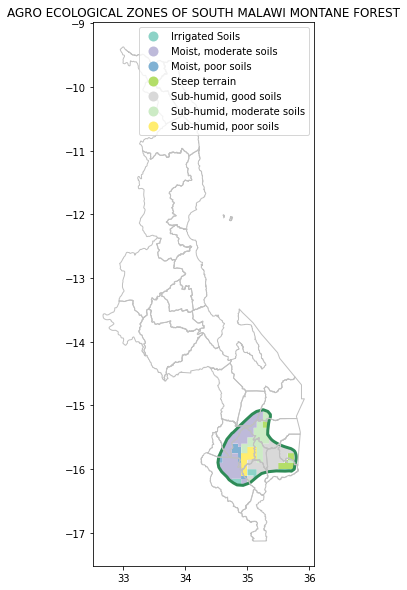

In [ ]:


# visualize agro-ecological zones on the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_title('AGRO ECOLOGICAL ZONES OF SOUTH MALAWI MONTANE FOREST')

plot_features(forest_agroeco_zones_df, ax=ax, column='value')
plot_forest(ax)
plot_colorless_disctricts(ax)
plt.show()

<a name="holdridge-life-zones"></a>
### Holdridge Life Zones

In [ ]:
# download ecological zones data
holdridge_zones_df = gpd.read_file('HoldridgeLifeZones.json')

In [ ]:
# normalize column's name
holdridge_zones_df.rename(columns={'DESC': 'desc'}, inplace=True)

In [ ]:
# get only necessary data related to forest
holdridge_zones_df = holdridge_zones_df[['desc', 'geometry']]
forest_holdridge_zones_df = holdridge_zones_df.clip(forest_df)

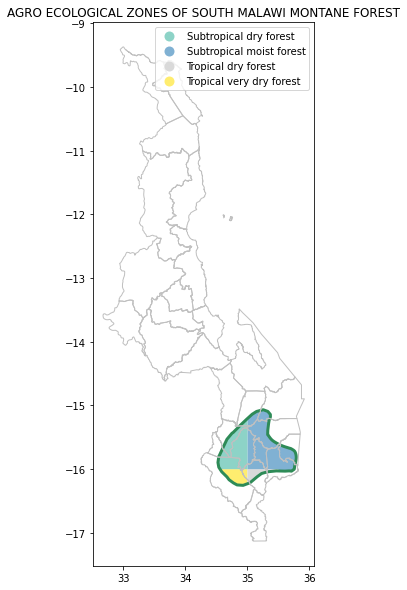

In [ ]:
# visualize agro-ecological zones on the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_title('AGRO ECOLOGICAL ZONES OF SOUTH MALAWI MONTANE FOREST')

plot_features(forest_holdridge_zones_df, ax=ax, column='desc')
plot_forest(ax)
plot_colorless_disctricts(ax)
plt.show()

<a name="soil-resource"></a>
### Soil Resource

In [ ]:
# download soil data
soil_df = gpd.read_file('World_Soil_Resources_wgs84.geojson')


In [ ]:
# normalize column's name
soil_df.rename(columns={'IPCC': 'ipcc'}, inplace=True)

# get only necessary data related to forest
soil_df = soil_df[['ipcc', 'geometry']]
forest_soil_df = soil_df.clip(forest_df)

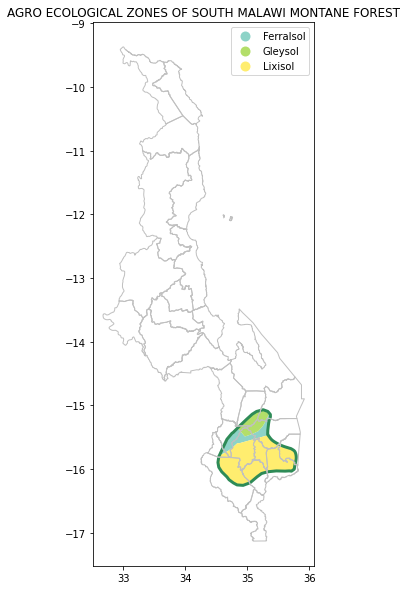

In [ ]:
# visualize agro-ecological zones on the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_title('AGRO ECOLOGICAL ZONES OF SOUTH MALAWI MONTANE FOREST')

plot_features(forest_soil_df, ax=ax, column='ipcc')
plot_forest(ax)
plot_colorless_disctricts(ax)
plt.show()

<a name="annual-mean-temperature"></a>
### Annual Mean Temperature

In [ ]:
# get temperature raster
temp_rst = r'wc2.1_2.5m_bio_1.tif'
temp_img = rst.open(temp_rst)

In [ ]:
# data for a clipped raster
out_temp, out_transform = mask(temp_img, [geom for geom in forest_df.geometry], crop=True, pad=True)
out_meta = temp_img.meta

# save clipped raster in a new file
out_meta.update({"driver": "GTiff",
                 "height": out_temp.shape[1],
                 "width": out_temp.shape[2],
                 "transform": out_transform})

with rst.open(r'temp_masked.tiff', 'w', **out_meta) as dest:
    dest.write(out_temp)

In [ ]:
# read previously saved raster
forest_temp_rst = r'temp_masked.tiff'
forest_temp_img = rst.open(forest_temp_rst)

# get the array and replace the -3.402823e+38 with np.nan
arr = forest_temp_img.read(1)
arr = np.where(arr < -10, np.nan, arr)

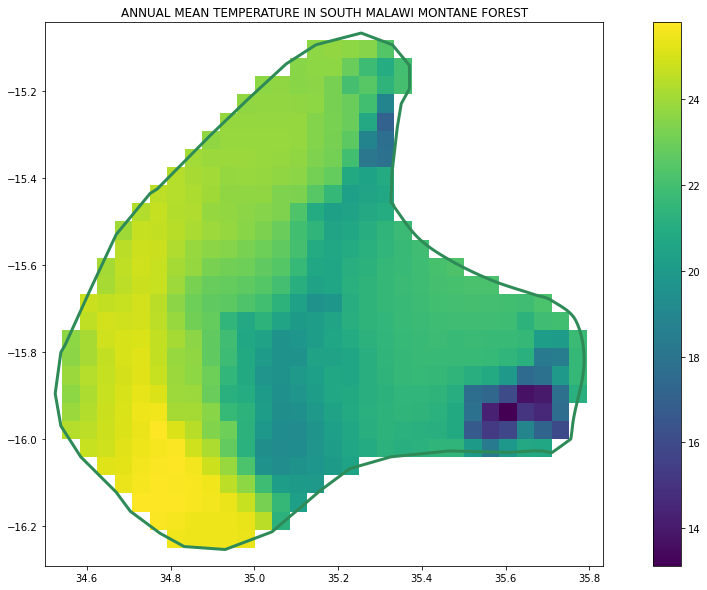

In [ ]:
# visualize temperature on the map
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

ax.set_title('ANNUAL MEAN TEMPERATURE IN SOUTH MALAWI MONTANE FOREST')
# set_map_limits()

show(arr, transform=forest_temp_img.transform, ax=ax)
plot_forest(ax)

fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(arr), vmax=np.nanmax(arr))), ax=ax)

plt.show()

<a name="annual-precipitation"></a>
### Annual Precipitation

In [ ]:
# get precipitation raster
precip_rst = r'wc2.1_2.5m_bio_12.tif'
precip_img = rst.open(precip_rst)

In [ ]:
# data for a clipped raster
out_precip, out_transform = mask(precip_img, [geom for geom in forest_df.geometry], crop=True, pad=True)
out_meta = precip_img.meta

# save clipped raster in a new file
out_meta.update({"driver": "GTiff",
                 "height": out_precip.shape[1],
                 "width": out_precip.shape[2],
                 "transform": out_transform})

with rst.open(r'precip_masked.tiff', 'w', **out_meta) as dest:
    dest.write(out_precip)


In [ ]:
# read previously saved raster
forest_precip_rst = r'precip_masked.tiff'
forest_precip_img = rst.open(forest_precip_rst)

# get the array and replace the -3.402823e+38 with np.nan
arr = forest_precip_img.read(1)
arr = np.where(arr < -10, np.nan, arr)

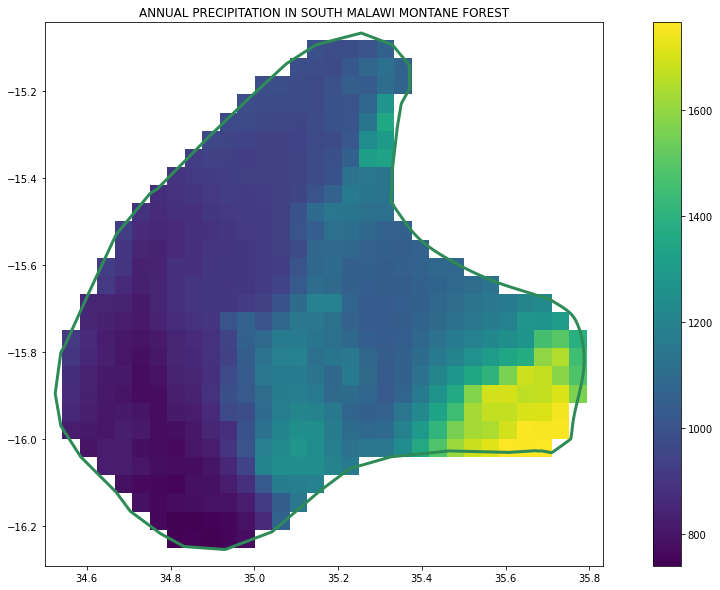

In [ ]:
# visualize precipitation on the map
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

ax.set_title('ANNUAL PRECIPITATION IN SOUTH MALAWI MONTANE FOREST')
# set_map_limits()

show(arr, transform=forest_precip_img.transform, ax=ax)
plot_forest(ax)

fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(arr), vmax=np.nanmax(arr))), ax=ax)

plt.show()